<a href="https://colab.research.google.com/github/onuralpArsln/MlAiTutorialProjects/blob/main/12-VideoSources/seabornVis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

 Bu not defterinde:
 - "Tips" veri kümesine benzer bir CSV dosyasını üreteceğiz.
 - **pandas** kullanarak veriyi keşfedecek ve temizleyeceğiz.
 - **seaborn** ve **matplotlib** kullanarak gelişmiş grafiklerle veriyi görselleştireceğiz.

In [16]:
# Kütüphaneler
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
# Seaborn için güzel bir tema ayarlayalım
sns.set_theme(style="whitegrid")

## Veri Hazırlama

 Bu örnek için, restoran bahşişlerini içeren örnek bir CSV dosyası oluşturuyoruz.
 Kendi CSV dosyanızı kullanmak isterseniz, oluşturma adımını atlayıp dosyanızı yükleyebilirsiniz.
 Burada csv dosyalarını elimizdeki datadan oluşturmayı görüyoruz.


In [ ]:
# Örnek DataFrame oluşturma
data = {
    'total_bill': [16.99, 10.34, 21.01, 23.68, 24.59, 25.29, 8.77, 26.88, 15.04, 14.78,
                   34.00, 17.50, 22.30, 12.45, 18.65, 28.75, 19.80, 11.00, 27.30, 13.90],
    'tip': [1.01, 1.66, 3.50, 3.31, 3.61, 4.71, 2.00, 3.12, 1.96, 3.23,
            5.00, 2.50, 4.00, 2.10, 3.40, 4.80, 3.00, 1.50, 4.20, 2.80],
    'sex': ['Female', 'Male', 'Male', 'Male', 'Female', 'Male', 'Male', 'Female', 'Female', 'Male',
            'Female', 'Male', 'Male', 'Female', 'Female', 'Male', 'Male', 'Female', 'Male', 'Female'],
    'smoker': ['No'] * 20,
    'day': ['Sun'] * 10 + ['Sat'] * 10,
    # İlk 10 kayıt için öğle, sonraki 10 kayıt için akşam yemeği
    'time': ['Öğle Yemeği'] * 10 + ['Akşam Yemeği'] * 10,
    'size': [2, 3, 3, 2, 4, 4, 2, 4, 2, 2,
             4, 2, 3, 2, 4, 5, 2, 3, 4, 2]
}


# datadan bir csv dosyası oluşturuyrouz
df = pd.DataFrame(data)

# DataFrame'i CSV dosyası olarak kaydetme
csv_filename = 'sample.csv'
df.to_csv(csv_filename, index=False)
print(f"CSV dosyası '{csv_filename}' başarıyla oluşturuldu!")


# Eğer Dahada fazla data istersen işte çok gelişmiş bir yaklaşım

In [ ]:
import random
def generate_random_data(n):
    data = {
        'total_bill': [round(random.uniform(5, 50), 2) for _ in range(n)],
        'tip': [round(random.uniform(1, 10), 2) for _ in range(n)],
        'sex': [random.choice(['Male', 'Female']) for _ in range(n)],
        'smoker': [random.choice(['Yes', 'No']) for _ in range(n)],
        'day': [random.choice(['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']) for _ in range(n)],
        'time': [random.choice(['Öğle Yemeği', 'Akşam Yemeği']) for _ in range(n)],
        'size': [random.randint(1, 6) for _ in range(n)]
    }
    return pd.DataFrame(data)

# Örnek kullanım: 3000 adet rastgele veri oluştur
df = generate_random_data(300)
print(df)

# tip belirleme
df['kişi sayısı'] = df['kişi sayısı'].astype(int)



# DataFrame'i CSV dosyası olarak kaydetme
csv_filename = 'sampleBig.csv'
df.to_csv(csv_filename, index=False)
print(f"CSV dosyası '{csv_filename}' başarıyla oluşturuldu!")


Artık bu dataları bir csv yaptığımız için, csvden okuma yapabilriz. Elinde bir csv dosyası var ise aynı şekilde okuman mümkün.

# Gerçek bir Data seti

Yukarıdakiş örnekler data setlerinin yapısı hakkındaydı ancak rastgele oldukları için bir ilşki yakalamak zor

In [17]:
!wget -q  https://raw.githubusercontent.com/onuralpArsln/MlAiTutorialProjects/refs/heads/main/12-VideoSources/tip.csv

In [18]:
# CSV dosyasını yükleme
df = pd.read_csv("tip.csv")


Pandas kullanarak veriyi biraz inceleyelim

In [21]:
# Veri kümesinin ilk birkaç satırını görüntüleme
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [22]:
# Veri kümesine ait temel bilgilerin görüntülenmesi
df.info(verbose=True, show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   total_bill  244 non-null    float64
 1   tip         244 non-null    float64
 2   sex         244 non-null    object 
 3   smoker      244 non-null    object 
 4   day         244 non-null    object 
 5   time        244 non-null    object 
 6   size        244 non-null    int64  
dtypes: float64(2), int64(1), object(4)
memory usage: 13.5+ KB


In [23]:
# Veri kümesinin istatistiksel özetinin görüntülenmesi
df.describe()

,total_bill,tip,size
count,244.000000,244.000000,244.000000
mean,19.785943,2.998279,2.569672
std,8.902412,1.383638,0.951100
min,3.070000,1.000000,1.000000
25%,13.347500,2.000000,2.000000
50%,17.795000,2.900000,2.000000
75%,24.127500,3.562500,3.000000
max,50.810000,10.000000,6.000000


## Seaborn ve Matplotlib ile Veri Görselleştirme
Şimdi verideki çeşitli özellikleri göstermek için bir dizi grafik oluşturalım.

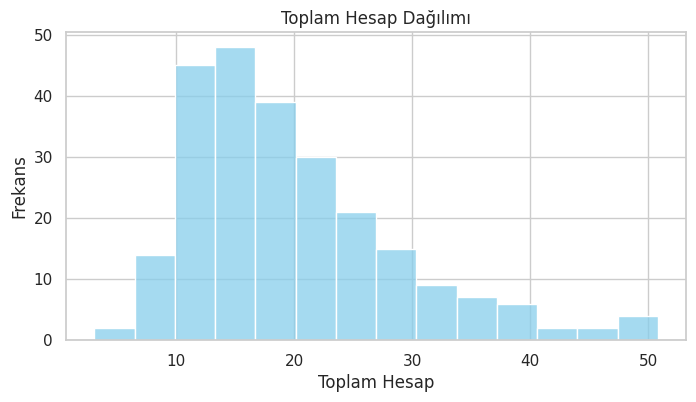

In [6]:
# Toplam hesap dağılımı
plt.figure(figsize=(8, 4))
sns.histplot(df['total_bill'], color="skyblue")
plt.title("Toplam Hesap Dağılımı")
plt.xlabel("Toplam Hesap")
plt.ylabel("Frekans")
plt.show()

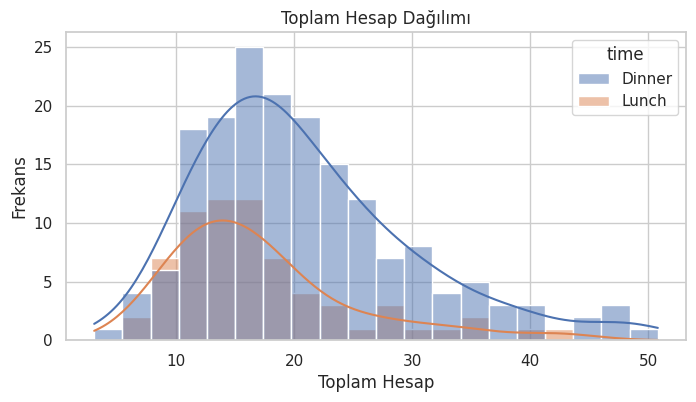

In [32]:
# Toplam hesap dağılımı with Kernel Density Estimation (KDE)
plt.figure(figsize=(8, 4))
sns.histplot(df, x="total_bill", hue="time", kde=True, bins=20)
plt.title("Toplam Hesap Dağılımı")
plt.xlabel("Toplam Hesap")
plt.ylabel("Frekans")
plt.show()

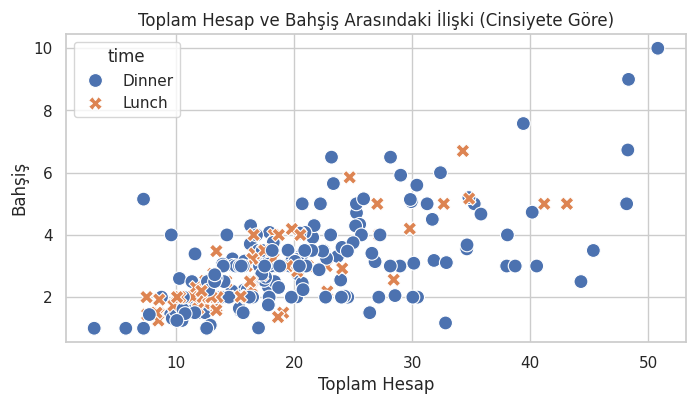

In [30]:
# Toplam hesap ve bahşiş arasındaki ilişkiyi gösteren saçılma grafiği
plt.figure(figsize=(8, 4))
sns.scatterplot(data=df, x='total_bill', y='tip', hue='sex', style='sex', s=100)
plt.title("Toplam Hesap ve Bahşiş Arasındaki İlişki (Cinsiyete Göre)")
plt.xlabel("Toplam Hesap")
plt.ylabel("Bahşiş")
plt.show()

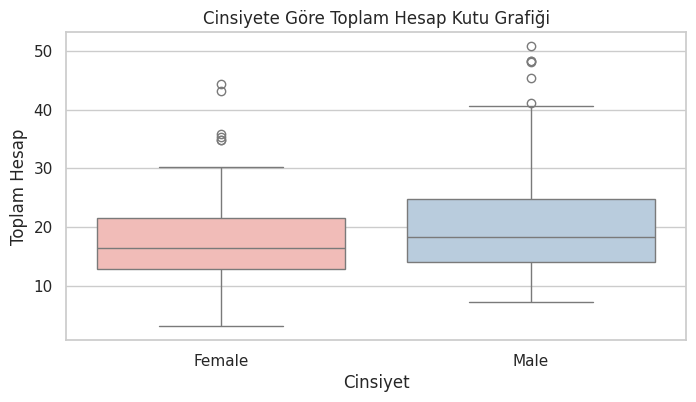

In [33]:
# Cinsiyete göre toplam hesap dağılımını gösteren kutu grafiği
plt.figure(figsize=(8, 4))
sns.boxplot(data=df, x='sex', y='total_bill',hue="sex", palette="Pastel1")
plt.title("Cinsiyete Göre Toplam Hesap Kutu Grafiği")
plt.xlabel("Cinsiyet")
plt.ylabel("Toplam Hesap")
plt.show()

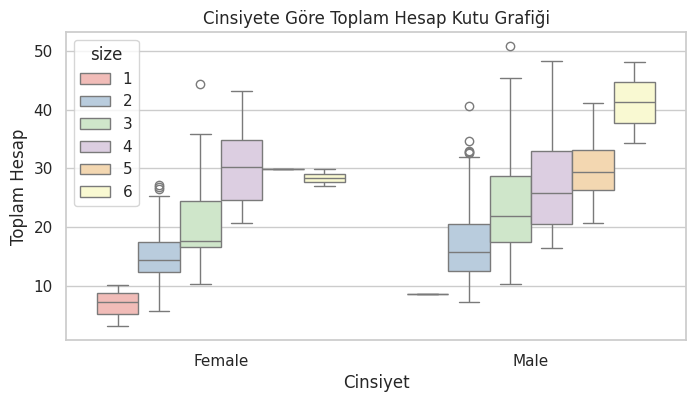

In [38]:
# Cinsiyete göre toplam hesap dağılımını grup boyutu ile  gösteren kutu grafiği
plt.figure(figsize=(8, 4))
sns.boxplot(data=df, x='sex', y='total_bill', hue="size", palette="Pastel1")
plt.title("Cinsiyete Göre Toplam Hesap Kutu Grafiği")
plt.xlabel("Cinsiyet")
plt.ylabel("Toplam Hesap")
plt.show()

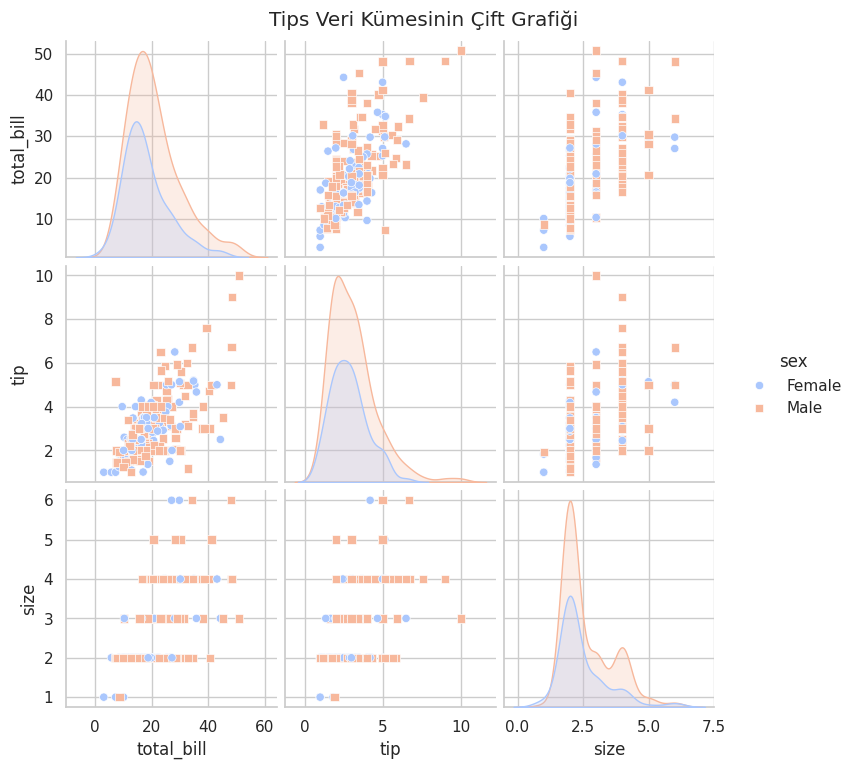

In [44]:
# Tüm sayısal değişkenler arasındaki ilişkileri keşfetmek için çift grafiği
sns.pairplot(df, hue='sex', palette="coolwarm", markers=["o", "s"])
plt.suptitle("Tips Veri Kümesinin Çift Grafiği", y=1.02)
plt.show()

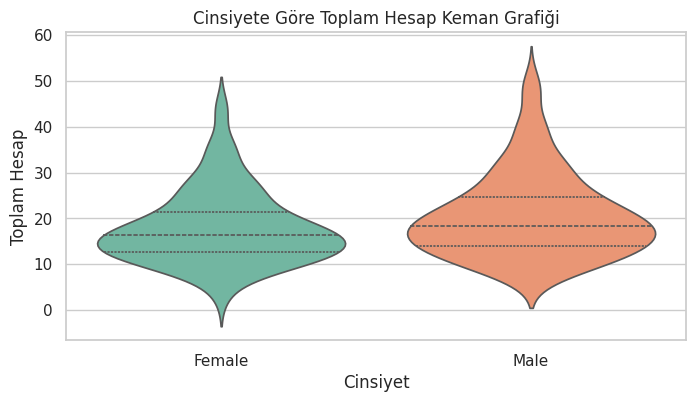

In [ ]:
# Keman grafiği: Kutu grafiği ve yoğunluk grafiğinin birleşimi
plt.figure(figsize=(8, 4))
sns.violinplot(data=df, x='sex', y='total_bill', hue='sex', palette="Set2", inner="quartile", legend=False)
plt.title("Cinsiyete Göre Toplam Hesap Keman Grafiği")
plt.xlabel("Cinsiyet")
plt.ylabel("Toplam Hesap")
plt.show()

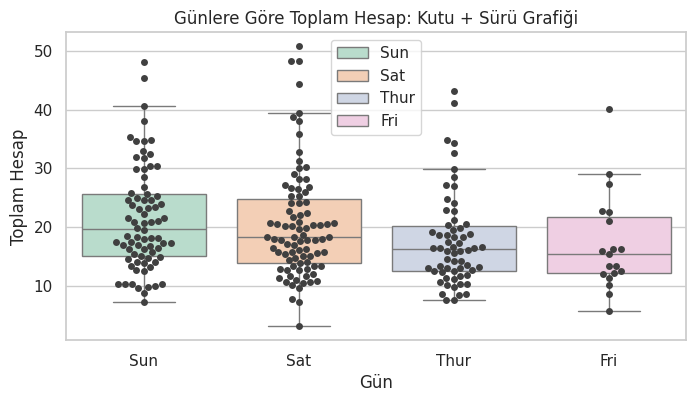

In [47]:
plt.figure(figsize=(8, 4))
sns.boxplot(data=df, x='day', y='total_bill', hue='day', palette="Pastel2", showfliers=False, legend=True)
sns.swarmplot(data=df, x='day', y='total_bill', color=".25")
plt.title("Günlere Göre Toplam Hesap: Kutu + Sürü Grafiği")
plt.xlabel("Gün")
plt.ylabel("Toplam Hesap")
plt.show()


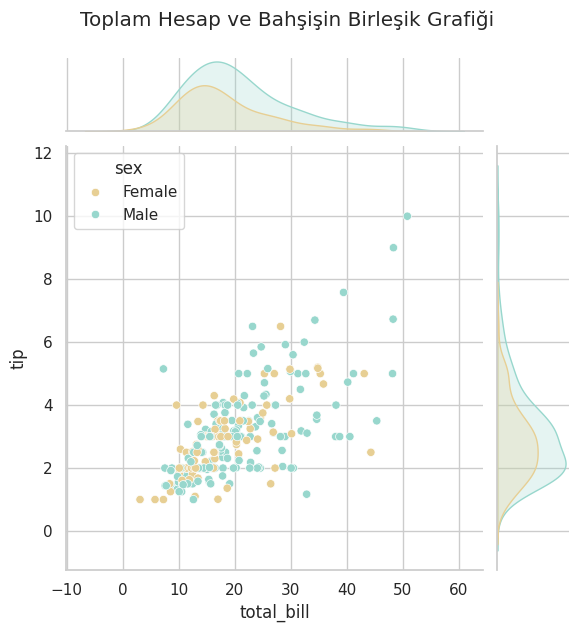

In [ ]:
# Birleşik grafik: Toplam hesap ve bahşiş arasındaki ilişkiyi kenar dağılımları ile gösterir
sns.jointplot(data=df, x='total_bill', y='tip', kind="scatter", hue='sex', palette="BrBG")
plt.suptitle("Toplam Hesap ve Bahşişin Birleşik Grafiği", y=1.05)
plt.show()


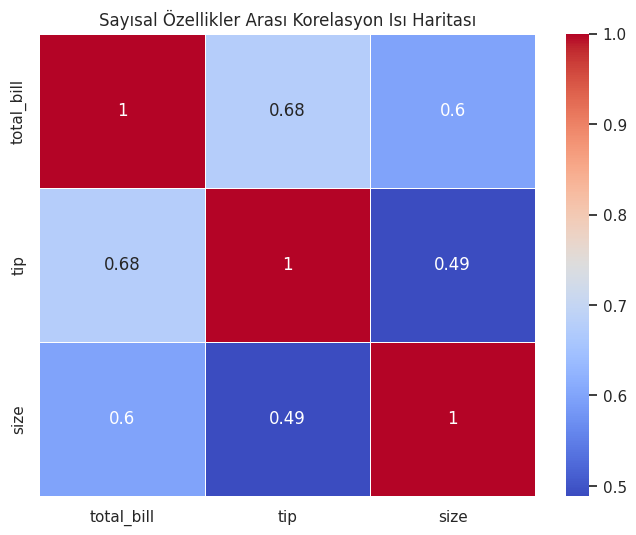

In [ ]:


# Isı haritası: Sayısal değişkenlerin korelasyon matrisini görselleştirir
plt.figure(figsize=(8, 6))
corr = df[['total_bill', 'tip', 'size']].corr()
sns.heatmap(corr, annot=True, cmap="coolwarm", linewidths=0.5)
plt.title("Sayısal Özellikler Arası Korelasyon Isı Haritası")
plt.show()

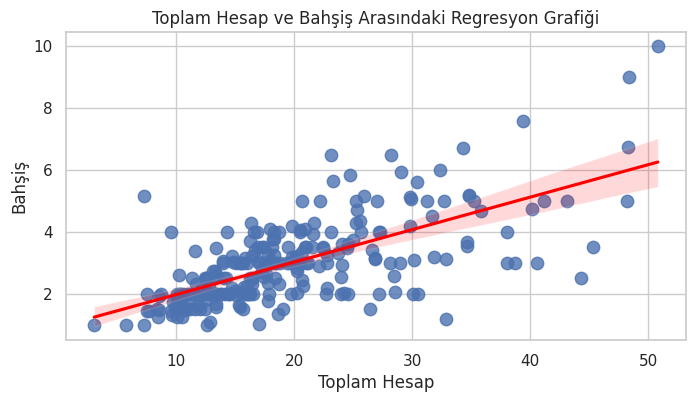

In [ ]:
# Regresyon grafiği: Toplam hesap ve bahşiş arasındaki doğrusal ilişkiyi gösterir
plt.figure(figsize=(8, 4))
sns.regplot(data=df, x='total_bill', y='tip', scatter_kws={'s': 80}, line_kws={'color': 'red'})
plt.title("Toplam Hesap ve Bahşiş Arasındaki Regresyon Grafiği")
plt.xlabel("Toplam Hesap")
plt.ylabel("Bahşiş")
plt.show()

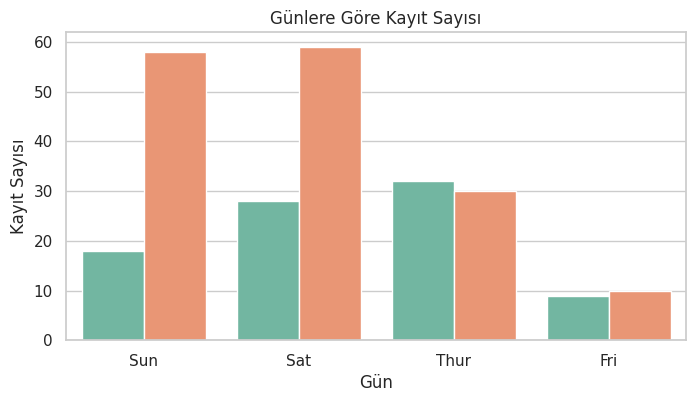

In [ ]:
# Kayıt sayısı grafiği: Her güne ait kayıt sayısını gösterir
plt.figure(figsize=(8, 4))
sns.countplot(data=df, x='day', hue='sex', palette="Set2", legend=False)
plt.title("Günlere Göre Veri Sayısı")
plt.xlabel("Gün")
plt.ylabel("Veri Sayısı")
plt.show()

<Figure size 1200x600 with 0 Axes>

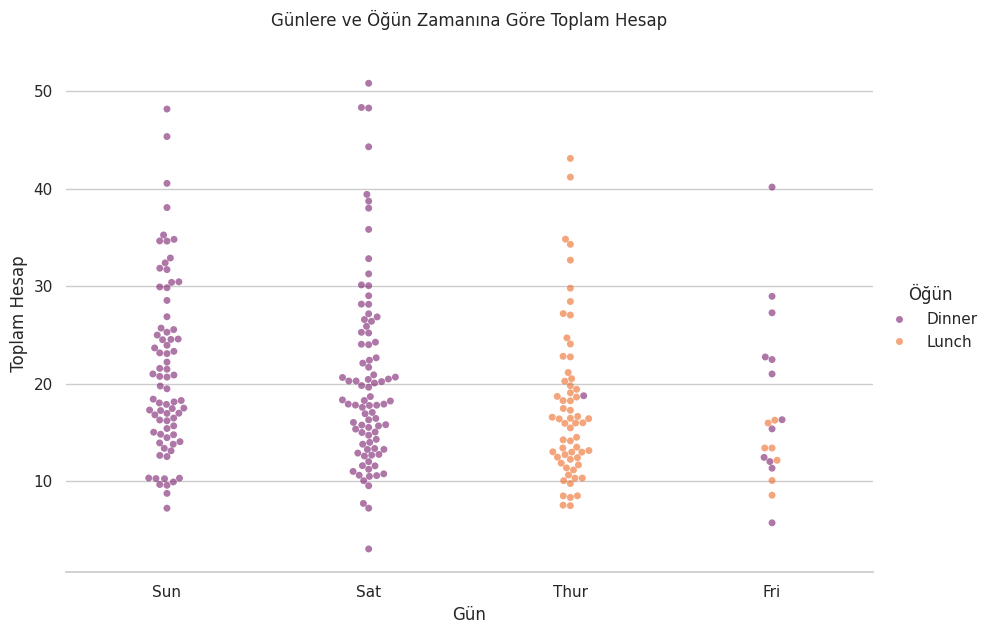

In [ ]:
# Yeni Grafik 1: Kategorik Çubuk Grafiği Gelişmiş (Facet Grid)
plt.figure(figsize=(12, 6))
g = sns.catplot(
    data=df, kind="swarm",
    x="day", y="total_bill", hue="time",
    palette="inferno", alpha=.6, height=6, aspect=1.5
)
g.despine(left=True)
g.set_axis_labels("Gün", " Toplam Hesap")
g.legend.set_title("Öğün")
plt.title("Günlere ve Öğün Zamanına Göre Toplam Hesap", y=1.05)
plt.show()

<Figure size 1000x600 with 0 Axes>

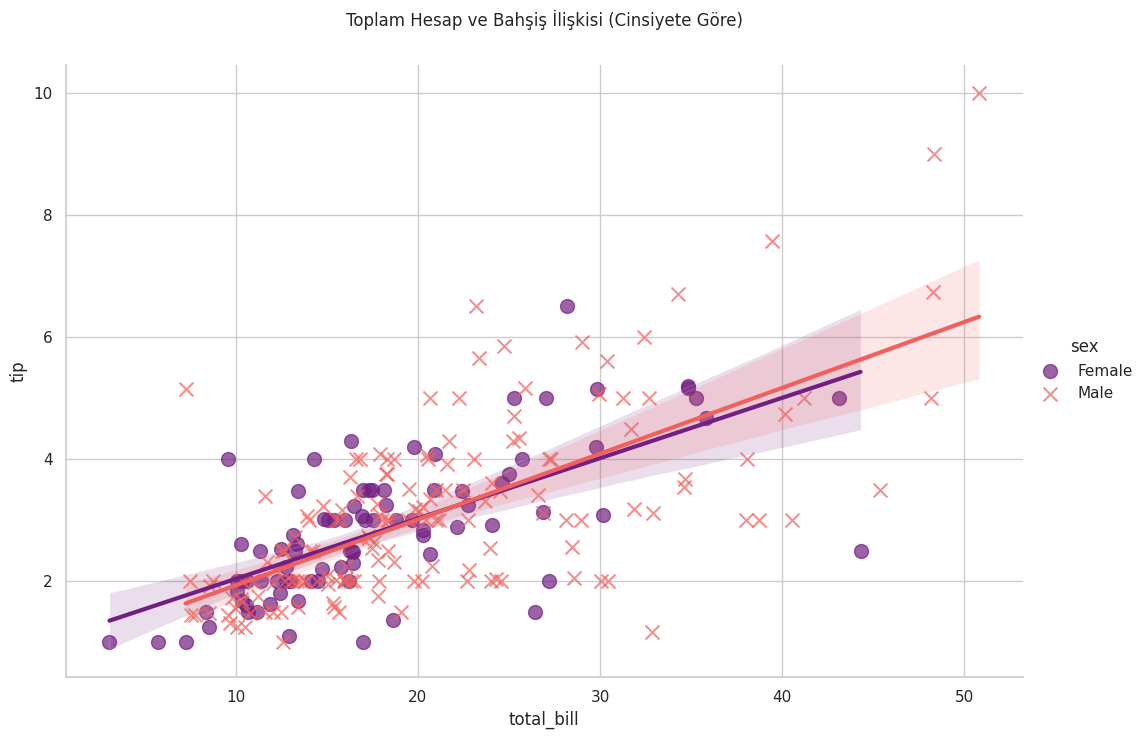

In [ ]:
# Yeni Grafik 2: Daha Gelişmiş Regresyon Grafiği (Bootstrap Interval)
plt.figure(figsize=(10, 6))
sns.lmplot(
    data=df, x="total_bill", y="tip",
    hue="sex", palette="magma", height=7, aspect=1.5,
    scatter_kws={"s": 100, "alpha": 0.7},
    line_kws={"linewidth": 3},
    markers=["o", "x"]
)
plt.title("Toplam Hesap ve Bahşiş İlişkisi (Cinsiyete Göre)", y=1.05)
plt.show()

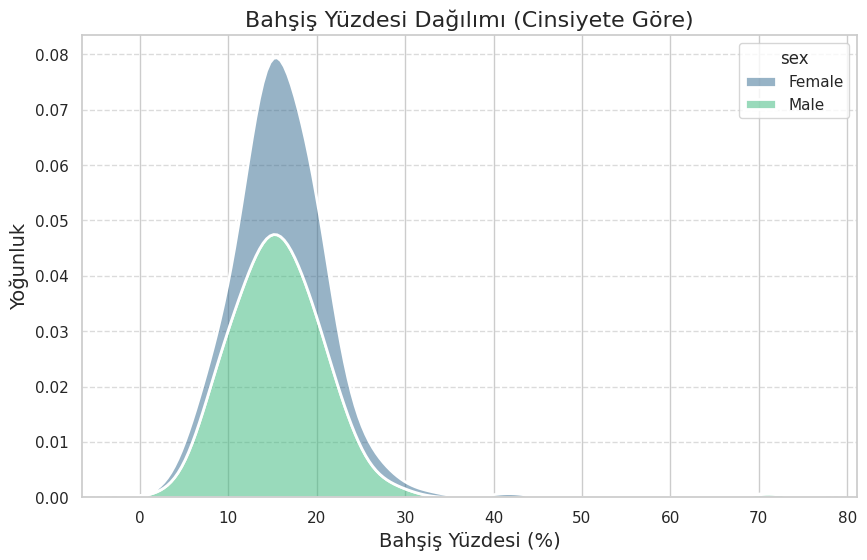

In [ ]:
# Yeni Grafik 3: Bahşiş Yüzdesi Dağılımı
df['tip_percent'] = (df['tip'] / df['total_bill']) * 100
plt.figure(figsize=(10, 6))
# KDE (Çekirdek Yoğunluk Tahmini) Grafiği
sns.kdeplot(
    data=df, x="tip_percent",
    hue="sex", multiple="stack",
    palette="viridis", linewidth=2,
    fill=True, alpha=0.5
)
plt.title("Bahşiş Yüzdesi Dağılımı (Cinsiyete Göre)", fontsize=16)
plt.xlabel("Bahşiş Yüzdesi (%)", fontsize=14)
plt.ylabel("Yoğunluk", fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


# "layer": Üst üste bindirerek çizer (varsayılan).
# "stack": Alanları üst üste koyarak yığar.
#"fill": Alanları yüzde bazında göstererek normalleştirir.


#fill=True → KDE eğrisi altındaki alanı doldurur.
#alpha=0.5 → Dolgu renginin saydamlık seviyesini belirler (0 tamamen saydam, 1 tamamen opak).


Pivot tablosunda eksik değerler var, doldurulacak.


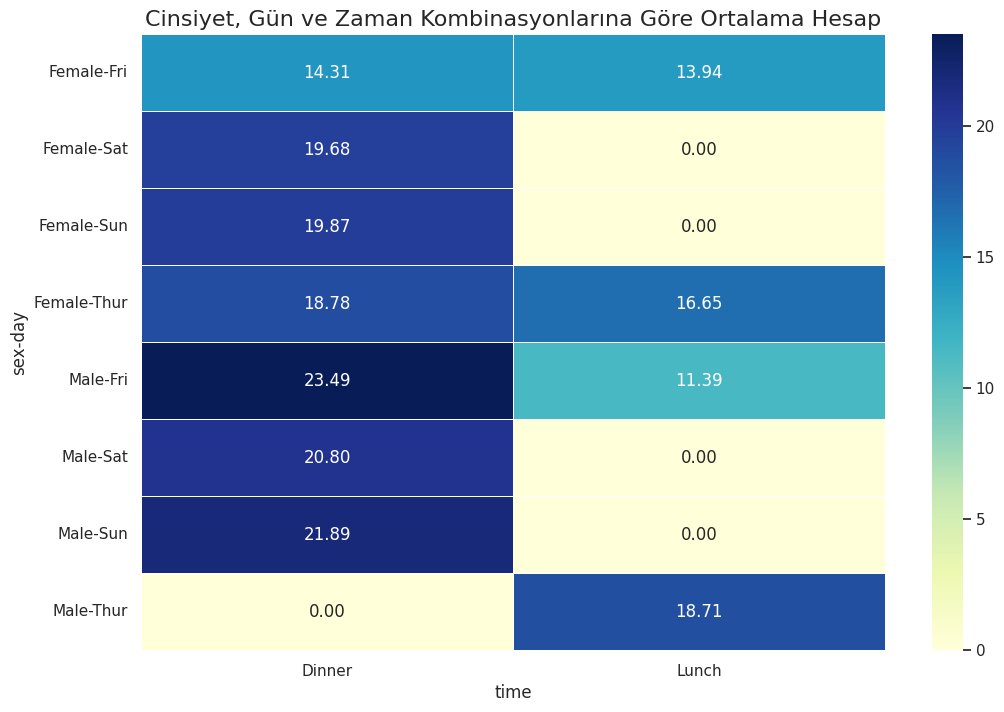

In [ ]:
# Clustermap için düzeltilmiş kod
# Pivot tablosunda NaN değerleri 0 ile doldurma veya eksik değerleri tamamen kaldırma

# Yaklaşım 1: NaN değerleri doldurmak
pivot_table = pd.pivot_table(
    df,
    values='total_bill',
    index=['sex', 'day'],
    columns='time',
    aggfunc='mean'
)

# NaN değerleri kontrol et ve doldur
if pivot_table.isnull().values.any():
    print("Pivot tablosunda eksik değerler var, doldurulacak.")
    pivot_table = pivot_table.fillna(0)  # Eksik değerleri 0 ile doldur

# Isı haritası olarak göster (clustermap yerine)
plt.figure(figsize=(12, 8))
sns.heatmap(
    pivot_table,
    annot=True,
    cmap="YlGnBu",
    linewidths=0.5,
    fmt=".2f"
)
plt.title("Cinsiyet, Gün ve Zaman Kombinasyonlarına Göre Ortalama Hesap", fontsize=16)
plt.show()


<Figure size 1200x800 with 0 Axes>

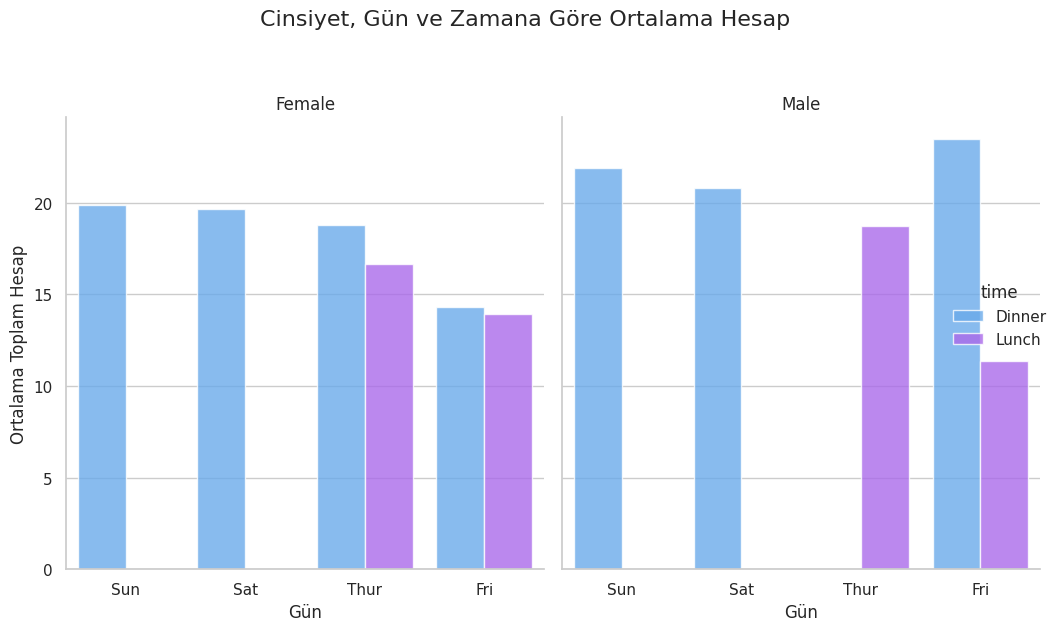

In [ ]:
# Alternatif: Daha güzel bir grup karşılaştırma grafiği
# Factor plot kullanarak kategorileri karşılaştırma
plt.figure(figsize=(12, 8))
g = sns.catplot(
    data=df,
    kind="bar",
    x="day",
    y="total_bill",
    hue="time",
    col="sex",
    palette="cool",
    height=6,
    aspect=0.8,
    errorbar=None,
    alpha=0.8
)
g.fig.suptitle("Cinsiyet, Gün ve Zamana Göre Ortalama Hesap", fontsize=16, y=1.05)
g.set_axis_labels("Gün", "Ortalama Toplam Hesap")
g.set_titles("{col_name}")
plt.tight_layout()
plt.show()

<Figure size 1200x1000 with 0 Axes>

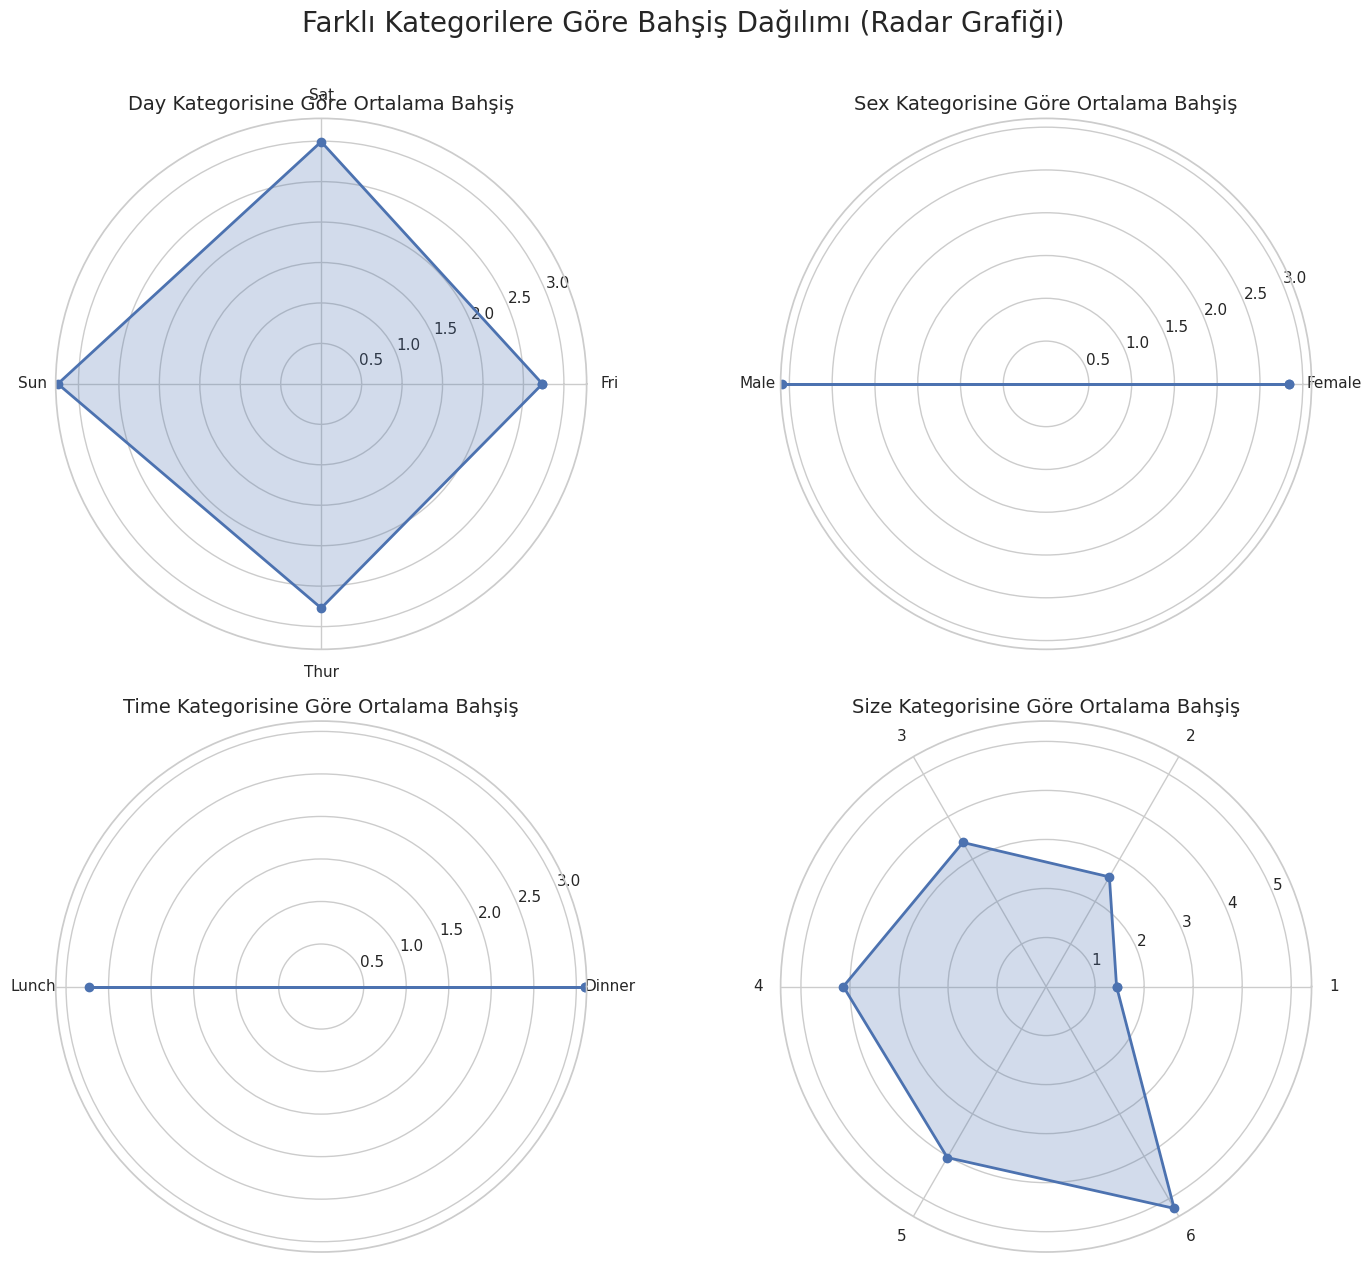

In [ ]:
# Yeni Grafik 5: Radar Grafiği (Örümcek Ağı Grafiği)
# Kategorik değişkenlere göre ortalama bahşişleri hesaplama
categories = ['day', 'sex', 'time', 'size']
radar_data = {}

for cat in categories:
    if cat == 'size':
        # Sayısal boyut sütununu kategori olarak ele alalım
        df['size_cat'] = df['size'].astype(str)
        radar_data[cat] = df.groupby('size_cat')['tip'].mean().to_dict()
    else:
        radar_data[cat] = df.groupby(cat)['tip'].mean().to_dict()

# Radar grafiği için figür oluşturma
plt.figure(figsize=(12, 10))

# Maksimum kategori sayısını bulalım
max_categories = max(len(v) for v in radar_data.values())
angles = np.linspace(0, 2*np.pi, max_categories, endpoint=False).tolist()

# Her kategori türü için ayrı bir subplot oluşturma
fig, axes = plt.subplots(2, 2, figsize=(15, 12), subplot_kw=dict(polar=True))
axes = axes.flatten()

for i, (category, values) in enumerate(radar_data.items()):
    ax = axes[i]

    # Değerler ve kategorileri ayarlama
    categories_list = list(values.keys())
    values_list = list(values.values())

    # Tam bir daire için değerleri kapatma
    values_list.append(values_list[0])
    categories_list.append(categories_list[0])

    # Açıları kategorilere göre ayarlama
    cat_angles = np.linspace(0, 2*np.pi, len(categories_list)-1, endpoint=False).tolist()
    cat_angles.append(cat_angles[0])  # Daireyi tamamlama

    # Radar çizgisini çizme
    ax.plot(cat_angles, values_list, 'o-', linewidth=2, label=category)
    ax.fill(cat_angles, values_list, alpha=0.25)

    # Grafiği güzelleştirme
    ax.set_thetagrids(np.degrees(cat_angles[:-1]), categories_list[:-1])
    ax.set_title(f"{category.capitalize()} Kategorisine Göre Ortalama Bahşiş", fontsize=14)
    ax.grid(True)

plt.tight_layout()
plt.suptitle("Farklı Kategorilere Göre Bahşiş Dağılımı (Radar Grafiği)", fontsize=20, y=1.05)
plt.show()

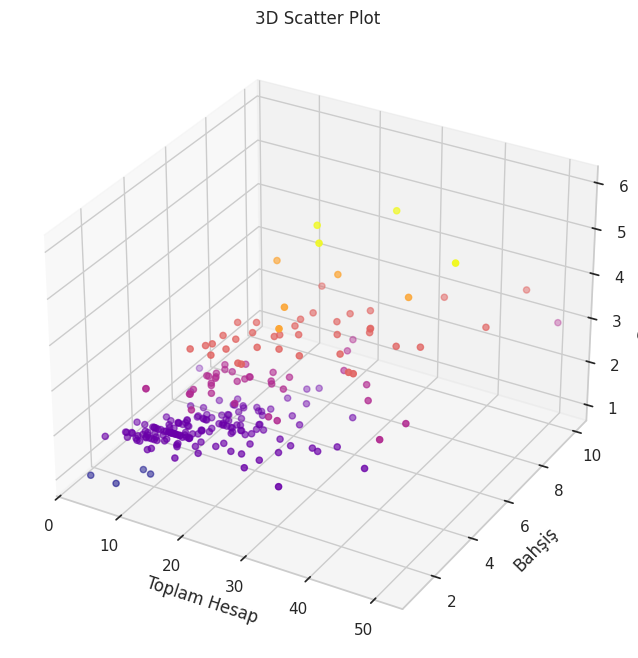

In [ ]:
from mpl_toolkits.mplot3d import Axes3D



# Example of selecting three numerical columns for the 3D plot
# Make sure you have columns like 'X', 'Y', 'Z' in your dataset
x = df['total_bill']  # Replace with actual column name
y = df['tip']  # Replace with actual column name
z = df['size']  # Replace with actual column name

# Set the Seaborn style
sns.set(style="whitegrid")

# Create a 3D plot
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot in 3D
ax.scatter(x, y, z, c=z, cmap='plasma', marker='o')

# Adding labels
ax.set_xlabel('Toplam Hesap')
ax.set_ylabel('Bahşiş')
ax.set_zlabel('Grup Boyutu')
ax.set_title('3D Scatter Plot')

# Show the plot
plt.show()